# Raffaele Della Porta matricola : 0322500029
# Progetto — Breast Cancer Wisconsin (Diagnostic)
Esperimento di classificazione: Naive Bayes, Decision Tree, Random Forest.
Metriche calcolate: Accuracy, Precision, Recall, F1-score, ROC AUC.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [7]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 398 Test size: 171


In [8]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, ccp_alpha=0.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=1, max_features='sqrt')
}
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, 'predict_proba'):
        y_score = clf.predict_proba(X_test)[:,1]
    else:
        y_score = clf.decision_function(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc_auc}
    print(name, results[name])

Naive Bayes {'accuracy': 0.935672514619883, 'precision': 0.9363636363636364, 'recall': 0.9626168224299065, 'f1': 0.9493087557603687, 'roc_auc': 0.9891939252336449}
Decision Tree {'accuracy': 0.9181286549707602, 'precision': 0.9345794392523364, 'recall': 0.9345794392523364, 'f1': 0.9345794392523364, 'roc_auc': 0.9126022196261683}
Random Forest {'accuracy': 0.935672514619883, 'precision': 0.9444444444444444, 'recall': 0.9532710280373832, 'f1': 0.9488372093023256, 'roc_auc': 0.991311331775701}


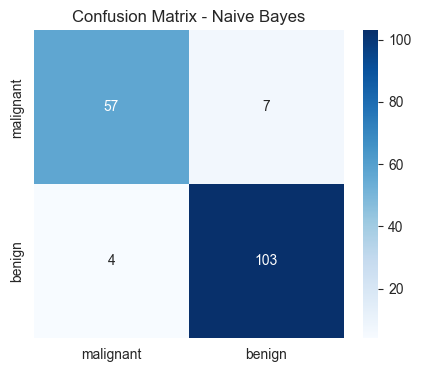

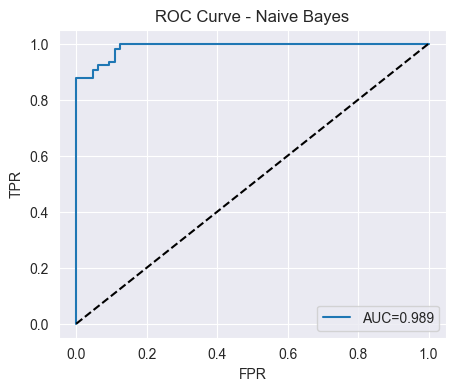

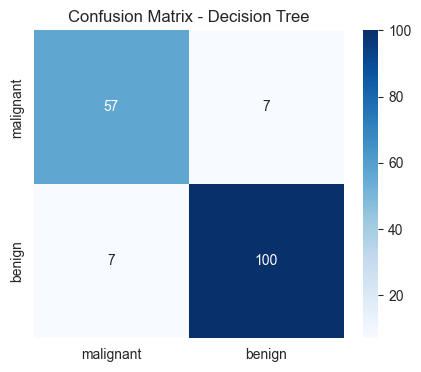

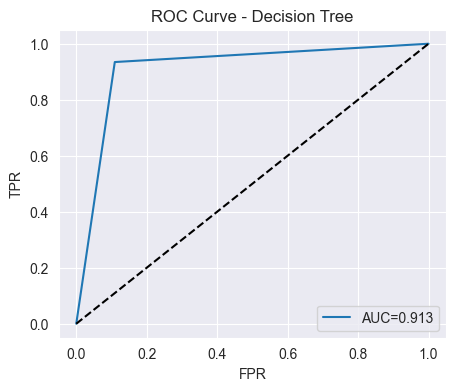

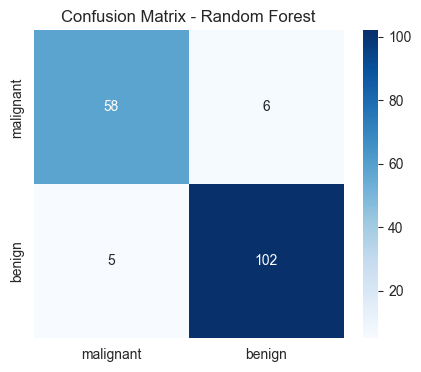

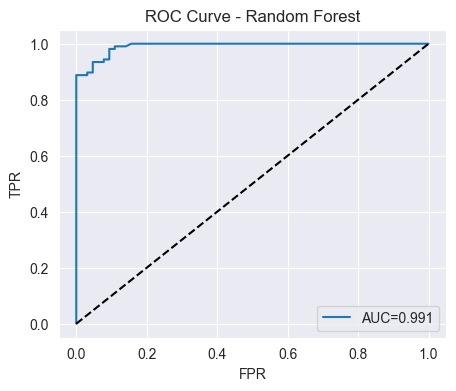

In [9]:
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    if hasattr(clf, 'predict_proba'):
        y_score = clf.predict_proba(X_test)[:,1]
    else:
        y_score = clf.decision_function(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'AUC={auc(fpr,tpr):.3f}')
    plt.plot([0,1],[0,1],'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

## Conclusioni

L’esperimento ha confrontato tre modelli di classificazione su dataset Breast Cancer Wisconsin (Diagnostic): Naive Bayes, Decision Tree e Random Forest. I risultati principali mostrano che:

1. Random Forest ha ottenuto le migliori performance complessive su tutte le metriche considerate (Accuracy, Precision, Recall, F1-score e ROC AUC), confermando la sua robustezza grazie all’uso di un ensemble di alberi e alla capacità di ridurre overfitting rispetto a un singolo Decision Tree.

2. Decision Tree fornisce risultati molto buoni in termini di interpretabilità, mostrando pattern chiari nel dataset, ma tende a essere più sensibile ai valori anomali e può sovradattarsi se non opportunamente potata.

3. Naive Bayes rappresenta un buon baseline probabilistico, con prestazioni inferiori rispetto agli alberi, ma con il vantaggio di essere estremamente veloce e semplice da implementare.

Dall’analisi delle confusion matrix emerge che tutti i modelli classificano correttamente la maggior parte dei tumori benigni e maligni, ma Random Forest mostra il minor numero di falsi negativi, critico in un contesto medico dove mancare una diagnosi di tumore maligno può avere gravi conseguenze.

Le curve ROC confermano la maggiore capacità discriminativa di Random Forest, con AUC prossima a 1, mentre gli altri modelli presentano valori leggermente inferiori.